In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # 导入3D绘图工具
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sns.set()
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

In [2]:
# 2.6.1 导入数据
data = pd.read_csv('Shanghai_cleaned.csv')

In [3]:
# 2.6.2 数据概况
data.describe()

,链家编号,总价,均价,面积,纬度,经度
count,2.986000e+03,2986.000000,2986.000000,2986.000000,2986.000000,2986.000000
mean,1.071038e+11,436.672974,61254.410583,73.608707,31.186931,121.458266
std,4.222046e+06,354.793294,26152.674281,36.366831,0.134081,0.132400
min,1.070000e+11,62.000000,10110.000000,21.770000,30.722779,121.041401
25%,1.071040e+11,280.000000,41969.500000,54.900000,31.129985,121.387896
50%,1.071040e+11,390.000000,61177.500000,64.310000,31.199503,121.441336
75%,1.071040e+11,495.000000,75215.000000,83.180000,31.276446,121.528886
max,1.071040e+11,9800.000000,226910.000000,765.280000,31.634329,121.926055


In [10]:
# 2.6.3 连续变量分布图：3D绘图、去除极端值

Text(0.5, 0, '总价')

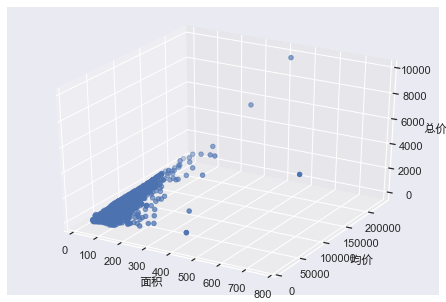

In [11]:
# 绘制3D图
fig = plt.figure()
ax = Axes3D(fig)
# 绘制散点图
ax.scatter(data['面积'],data['均价'],data['总价'])
# 设置坐标轴
ax.set_xlabel('面积')
ax.set_ylabel('均价')
ax.set_zlabel('总价')

In [12]:
# 数据筛选：去除极端值
sample = data[(data['总价']<1500) & (data['面积']<150) & (data['均价']<200000)][['总价','均价','面积']]
sample

,总价,均价,面积
0,360.0,39259,91.70
2,155.0,15611,99.29
3,206.0,25333,81.32
4,310.0,40302,76.92
5,410.0,42914,95.54
...,...,...,...
2981,616.0,89263,69.01
2982,434.0,83079,52.24
2983,460.0,70553,65.20
2984,476.0,71066,66.98


Text(0.5, 0, '总价')

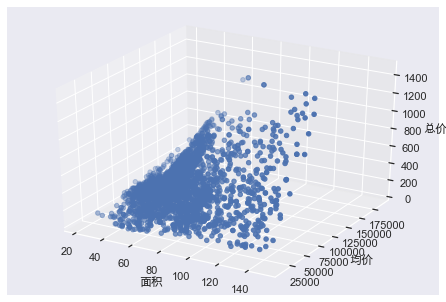

In [13]:
# 绘制3D图
fig = plt.figure()
ax = Axes3D(fig)
# 绘制散点图
ax.scatter(sample['面积'],sample['均价'],sample['总价'])
# 设置坐标轴
ax.set_xlabel('面积')
ax.set_ylabel('均价')
ax.set_zlabel('总价')

In [14]:
# 2.6.4 KMeans聚类
km = KMeans(n_clusters=7) # 标签：0~6
y_pred = km.fit_predict(sample) # 得到分类标签

In [15]:
y_pred

array([0, 3, 3, ..., 2, 2, 2], dtype=int32)

In [19]:
centers = km.cluster_centers_
centers = pd.DataFrame(centers)

In [20]:
centers

,0,1,2
0,305.658051,38802.567797,78.718835
1,545.050885,84518.347345,64.387102
2,415.778018,67725.250318,61.431830
3,196.891667,23344.638889,85.003500
4,773.636364,137456.454545,56.059636
5,675.878689,106812.469945,63.333333
6,372.893493,53675.327055,69.826113


Text(0.5, 0, '总价')

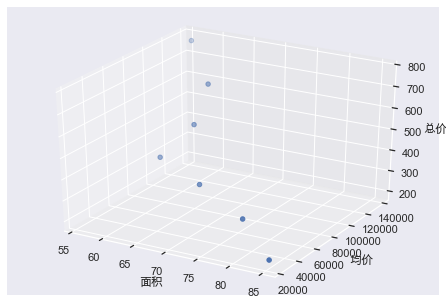

In [29]:
# 绘制3D图
fig = plt.figure()
ax = Axes3D(fig)
# 绘制散点图
ax.scatter(centers[2],centers[1],centers[0])
# 设置坐标轴
ax.set_xlabel('面积')
ax.set_ylabel('均价')
ax.set_zlabel('总价')

In [23]:
sample['label'] = pd.DataFrame(y_pred)
sample[:3]

,总价,均价,面积,label
0,360.0,39259,91.70,0.0
2,155.0,15611,99.29,3.0
3,206.0,25333,81.32,0.0


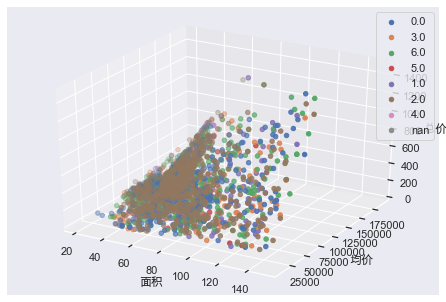

In [27]:
# 绘制3D图
fig = plt.figure()
ax = Axes3D(fig)
# 绘制散点图
for typ in sample['label'].unique():
    temp = sample[sample['label']==typ]
    ax.scatter(temp['面积'],temp['均价'],temp['总价'])
# 设置坐标轴
ax.set_xlabel('面积')
ax.set_ylabel('均价')
ax.set_zlabel('总价')
plt.legend(sample['label'].unique())

In [35]:
# 2.6.5 轮廓系数确定k值
for k in range(2,10):
    y_pred = KMeans(n_clusters=k).fit_predict(sample[['总价','均价','面积']])
    score = silhouette_score(sample[['总价','均价','面积']],y_pred)
    print('k值：',k,',轮廓系数值：',score)

k值： 2 ,轮廓系数值： 0.5400480732352066
k值： 3 ,轮廓系数值： 0.5632318719309497
k值： 4 ,轮廓系数值： 0.5450931565261192
k值： 5 ,轮廓系数值： 0.5428808937925942
k值： 6 ,轮廓系数值： 0.5417391242981492
k值： 7 ,轮廓系数值： 0.5494427711190348
k值： 8 ,轮廓系数值： 0.5422150804110684
k值： 9 ,轮廓系数值： 0.5332192699692145


In [37]:
km = KMeans(n_clusters=3) # 标签：0~6
y_pred = km.fit_predict(sample[['总价','均价','面积']]) # 得到分类标签

In [38]:
sample['label'] = pd.DataFrame(y_pred)

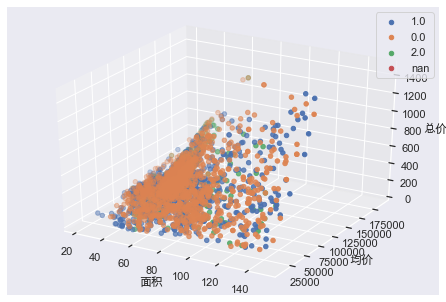

In [39]:
# 绘制3D图
fig = plt.figure()
ax = Axes3D(fig)
# 绘制散点图
for typ in sample['label'].unique():
    temp = sample[sample['label']==typ]
    ax.scatter(temp['面积'],temp['均价'],temp['总价'])
# 设置坐标轴
ax.set_xlabel('面积')
ax.set_ylabel('均价')
ax.set_zlabel('总价')
plt.legend(sample['label'].unique())

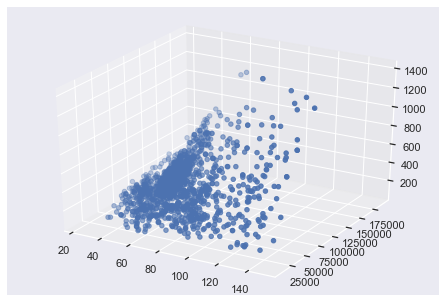

In [42]:
fig = plt.figure()
ax = Axes3D(fig)
# 类别1：40-60平米、10-15w均价、300w总价
temp = sample[sample['label']==0]
ax.scatter(temp['面积'],temp['均价'],temp['总价'])

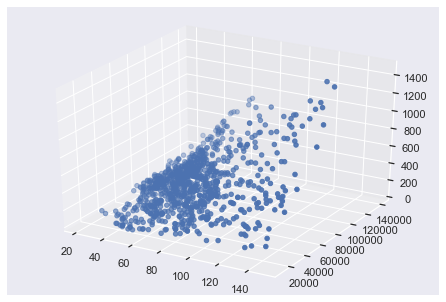

In [47]:
fig = plt.figure()
ax = Axes3D(fig)
# 类别2：30-60平米、6-12w均价、300w总价
temp = sample[sample['label']==1]
ax.scatter(temp['面积'],temp['均价'],temp['总价'])

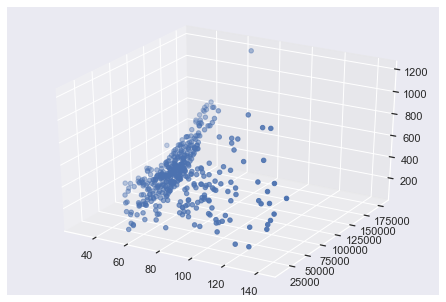

In [49]:
fig = plt.figure()
ax = Axes3D(fig)
# 类别2：40-60平米、10w均价、300w总价
temp = sample[sample['label']==2]
ax.scatter(temp['面积'],temp['均价'],temp['总价'])

In [50]:
# 2.6.6 数据观察
# A：# 类别1：40-60平米、10-15w均价、300w总价 
# B：# 类别2：30-60平米、6-12w均价、300w总价
# C：# 类别2：40-60平米、10w均价、300w总价
	0	1	2
0	418.634325	66139.351557	63.602194 —— 品质次新房/市中心老破小
1	275.248028	34682.004044	80.460981 —— 远大新（旧）房
2	643.988235	101965.708061	63.566492 —— 优质精品房 


Text(0.5, 0, '总价')

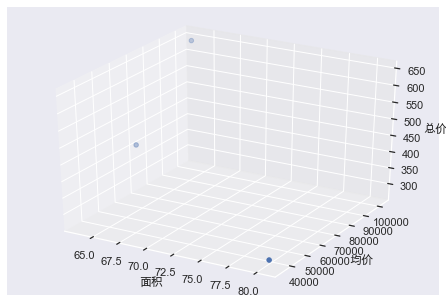

In [51]:
centers2 = pd.DataFrame(km.cluster_centers_)
# 绘制3D图
fig = plt.figure()
ax = Axes3D(fig)
# 绘制散点图
ax.scatter(centers2[2],centers2[1],centers2[0])
# 设置坐标轴
ax.set_xlabel('面积')
ax.set_ylabel('均价')
ax.set_zlabel('总价')

In [52]:
centers2

,0,1,2
0,418.634325,66139.351557,63.602194
1,275.248028,34682.004044,80.460981
2,643.988235,101965.708061,63.566492
